In [73]:
%pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('./cleaned_datas/airbnb_paris_september_2024_cleaned.csv')

# Afficher les premières lignes pour vérifier les données
df.head()


,listing_url,bathrooms,bedrooms,accommodates,bathrooms_text,beds,property_type,room_type,latitude,longitude,neighbourhood_cleansed,minimum_nights,maximum_nights,availability_365,instant_bookable,price
0,https://www.airbnb.com/rooms/3109,1.0,1.0,2,1 bath,1.0,Entire rental unit,Entire home/apt,48.831910,2.318700,Observatoire,2,30,297,t,113.0
1,https://www.airbnb.com/rooms/5396,1.0,0.0,2,1 bath,1.0,Entire rental unit,Entire home/apt,48.852470,2.358350,Hôtel-de-Ville,2,730,77,f,95.0
2,https://www.airbnb.com/rooms/7397,1.0,2.0,4,1 bath,1.0,Entire rental unit,Entire home/apt,48.859090,2.353150,Hôtel-de-Ville,10,130,316,f,145.0
3,https://www.airbnb.com/rooms/241715,1.0,3.0,6,1 bath,0.0,Entire rental unit,Entire home/apt,48.893464,2.378341,Buttes-Chaumont,5,120,173,f,450.0
4,https://www.airbnb.com/rooms/9952,1.0,1.0,2,1 bath,1.0,Entire rental unit,Entire home/apt,48.863730,2.370930,Popincourt,4,31,183,f,246.0


In [75]:
df.info()

# Statistiques descriptives sur les données numériques
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60490 entries, 0 to 60489
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_url             60490 non-null  object 
 1   bathrooms               60490 non-null  float64
 2   bedrooms                60490 non-null  float64
 3   accommodates            60490 non-null  int64  
 4   bathrooms_text          60490 non-null  object 
 5   beds                    60490 non-null  float64
 6   property_type           60490 non-null  object 
 7   room_type               60490 non-null  object 
 8   latitude                60490 non-null  float64
 9   longitude               60490 non-null  float64
 10  neighbourhood_cleansed  60490 non-null  object 
 11  minimum_nights          60490 non-null  int64  
 12  maximum_nights          60490 non-null  int64  
 13  availability_365        60490 non-null  int64  
 14  instant_bookable        60490 non-null

,bathrooms,bedrooms,accommodates,beds,latitude,longitude,minimum_nights,maximum_nights,availability_365,price
count,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000,60490.000000
mean,1.175748,1.281253,3.327525,1.757464,48.863768,2.342117,6.301438,399.811704,179.719954,206.333675
std,0.455361,0.831186,1.672114,1.129798,0.018118,0.034574,12.115719,394.834639,119.182830,162.153524
min,0.000000,0.000000,1.000000,0.000000,48.816090,2.228970,1.000000,1.000000,0.000000,8.000000
25%,1.000000,1.000000,2.000000,1.000000,48.850489,2.319505,1.000000,40.000000,70.000000,101.000000
50%,1.000000,1.000000,3.000000,1.000000,48.864980,2.346211,2.000000,365.000000,177.000000,150.000000
75%,1.000000,2.000000,4.000000,2.000000,48.878306,2.366911,4.000000,365.000000,276.000000,250.000000
max,7.500000,13.000000,16.000000,29.000000,48.901590,2.468360,90.000000,1126.000000,365.000000,1000.000000


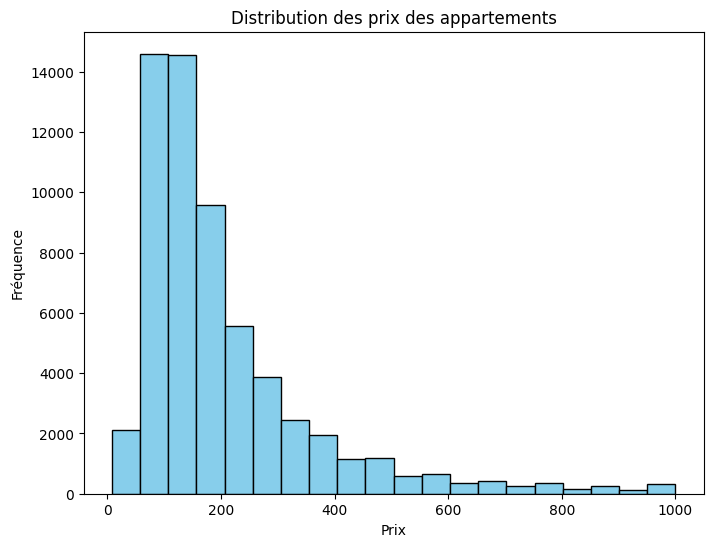

In [76]:
import matplotlib.pyplot as plt

# Histogramme des prix
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des prix des appartements')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


# Distribution des prix des appartements :
- La distribution est clairement asymétrique et présente une longue traîne vers la droite.
- La majorité des prix se situent entre 0 et 200, avec une décroissance rapide au-delà de cette plage.
- Les prix supérieurs à 600 sont beaucoup plus rares et pourraient potentiellement représenter des valeurs aberrantes ou des logements de luxe.
- Cela confirme que les données sur les prix nécessitent potentiellement une transformation logarithmique pour réduire l'impact des valeurs extrêmes.

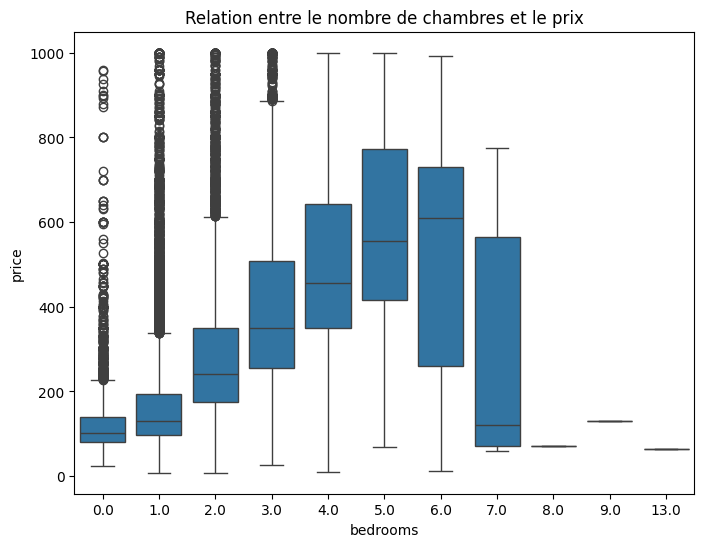

In [77]:
import seaborn as sns

# Relation entre le prix et le nombre de chambres
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Relation entre le nombre de chambres et le prix')
plt.show()

# Relation entre le nombre de chambres et le prix :
- On observe une tendance logique à la hausse des prix avec l'augmentation du nombre de chambres.
- Toutefois, les prix présentent une forte variabilité dans chaque catégorie de chambres :
  - Pour 1 ou 2 chambres, il existe des prix très variés (de très bas à très élevés).
  - Les propriétés avec plus de 4 chambres tendent à avoir des prix plus élevés, mais le nombre de données diminue (moins de points pour 6 chambres et plus).
- Les valeurs extrêmes (outliers) sont particulièrement visibles pour les catégories de 1 à 3 chambres. Cela pourrait indiquer des propriétés qui sont surévaluées ou mal classifiées.

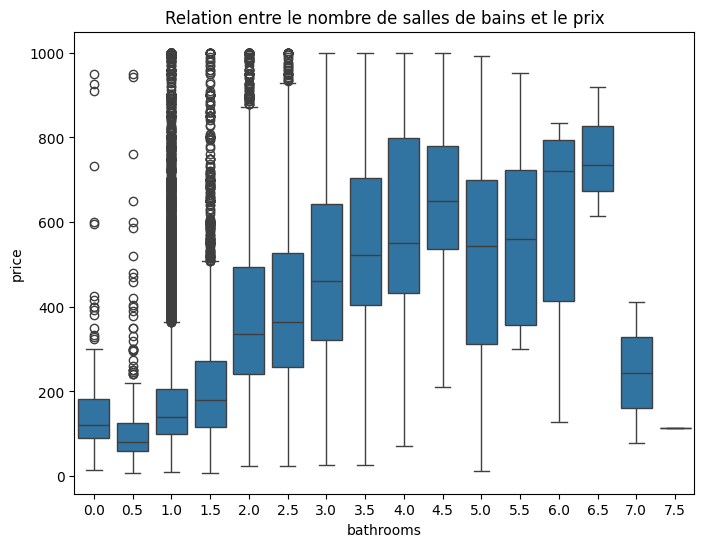

In [78]:
# Relation entre le prix et le nombre de salles de bains
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Relation entre le nombre de salles de bains et le prix')
plt.show()

Il y a une corrélation positive claire entre le nombre de salles de bains et le prix. Plus une propriété dispose de salles de bains, plus son prix médian est élevé.
Cependant, cette relation devient moins claire au-delà de 4 salles de bains, car le nombre de propriétés dans ces catégories diminue (échantillon plus petit).

Variabilité importante dans chaque catégorie :
-Pour les propriétés avec 1 ou 2 salles de bains, les prix montrent une très large variabilité (grande amplitude interquartile).
Les propriétés avec 3 à 6 salles de bains présentent une augmentation progressive des médianes, mais elles ont aussi des écarts importants.

Outliers :
Comme pour les chambres, il existe des valeurs atypiques (outliers) pour toutes les catégories, en particulier pour 1 à 2 salles de bains, avec des prix très élevés (> 600 ou 800). Ces propriétés pourraient être des biens luxueux ou des cas mal classifiés.
Catégories rares :

Les propriétés avec 6, 6.5 ou 7 salles de bains semblent être rares, avec un échantillon limité (ce qui est attendu). Cela peut nuire à la fiabilité de l'analyse dans ces cas particuliers.

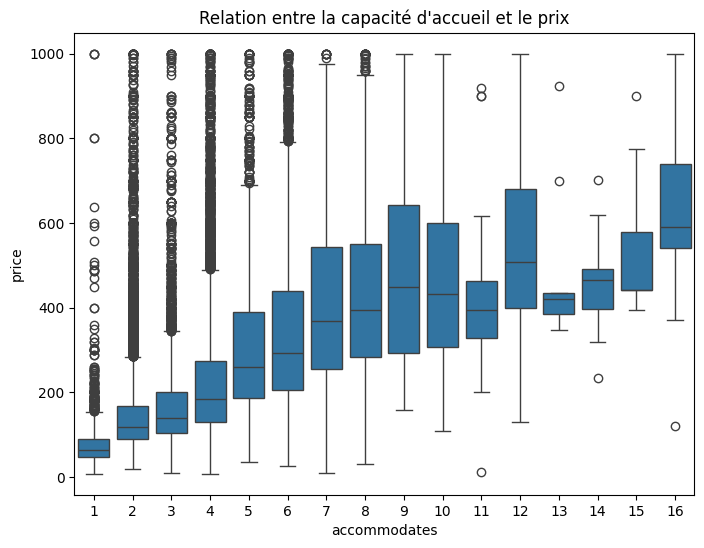

In [79]:
# Relation entre le prix et la capacité d'accueil
plt.figure(figsize=(8, 6))
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('Relation entre la capacité d\'accueil et le prix')
plt.show()

# Relation entre la capacité d'accueil et le prix
- Tendance générale : On observe une augmentation du prix médian avec l'augmentation de la capacité d'accueil. Cela indique que plus un logement peut accueillir de personnes, plus son prix est élevé.
- Dispersion : Les prix sont plus dispersés pour les logements de grande capacité (par exemple, 6 personnes et plus). Cela pourrait refléter une gamme variée de propriétés (de simples dortoirs à des villas de luxe).
- Outliers : De nombreux outliers (prix très élevés) apparaissent dans chaque catégorie, mais ils sont plus marqués pour les capacités élevées.

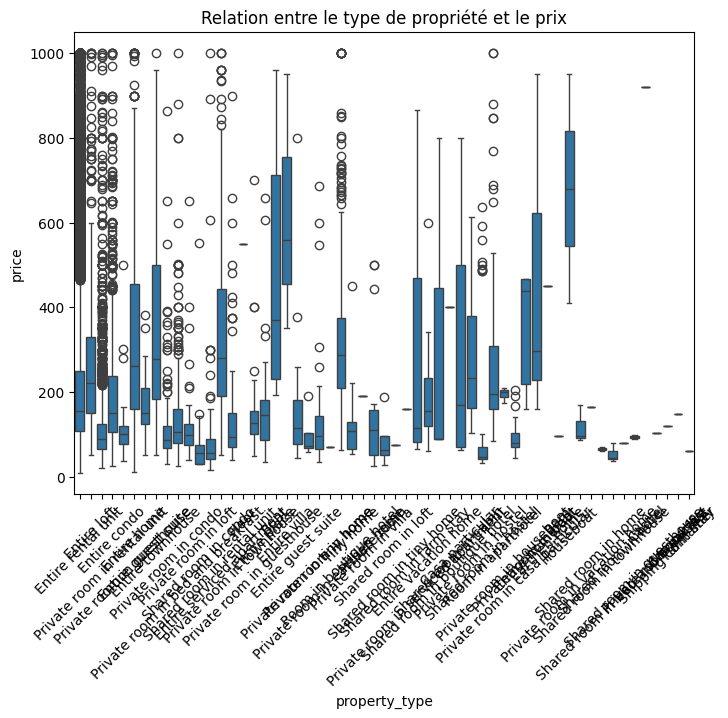

In [80]:
# Relation entre le prix et le type de propriété
plt.figure(figsize=(8, 6))
sns.boxplot(x='property_type', y='price', data=df)
plt.title('Relation entre le type de propriété et le prix')
plt.xticks(rotation=45)
plt.show()


# Relation entre le type de propriété et le prix
- Variabilité : Les types de propriétés comme "Entire Home" et "Entire Loft" semblent avoir des prix médian relativement élevés, tandis que les "Shared Rooms" et certains "Private Rooms" ont des prix bien inférieurs.
- Diversité : Le nombre de types de propriétés est vaste, rendant l'interprétation des catégories moins fréquentes plus complexe.
- Outliers : Une grande variabilité des prix est présente dans presque toutes les catégories, mais particulièrement marquée dans les logements les plus chers.


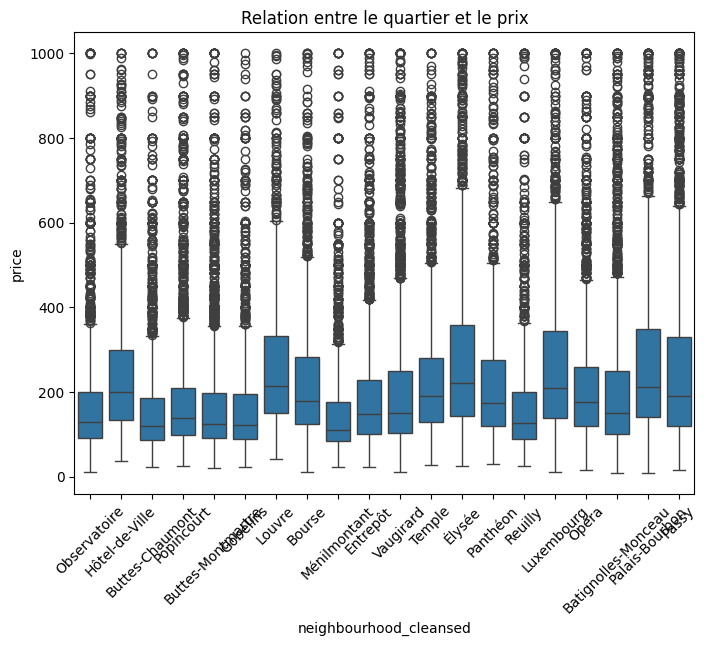

In [81]:
# Relation entre le prix et le quartier
plt.figure(figsize=(8, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df)
plt.title('Relation entre le quartier et le prix')
plt.xticks(rotation=45)
plt.show()

# Relation entre le quartier et le prix
- Quartiers chers : Certains quartiers comme "Louvre", "Élysée", et "Luxembourg" présentent des prix médians plus élevés, ce qui reflète probablement leur statut prestigieux.
- Quartiers abordables : D'autres quartiers comme "Observatoire" ou "Batignolles-Monceau" affichent des prix médian plus bas.
- Dispersion : Les prix dans chaque quartier montrent une importante variabilité, avec de nombreux outliers dans chaque groupe, suggérant une gamme variée de types de propriétés.


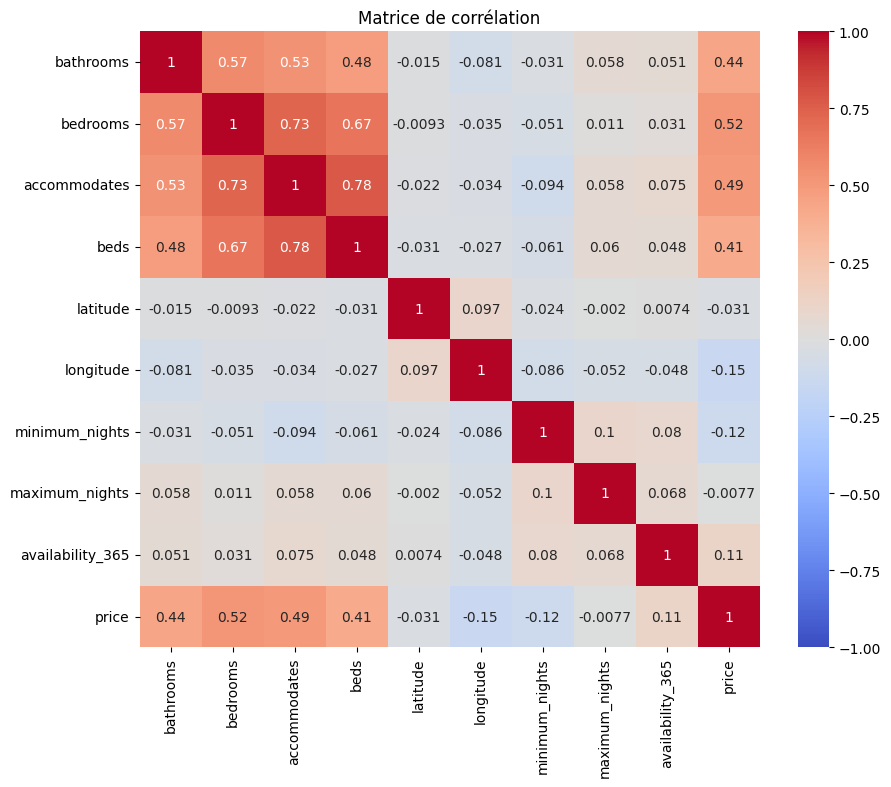

In [82]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Afficher la matrice de corrélation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()


# Analyse des corrélations :

- "price" : La variable "price" (prix) est modérément corrélée avec :

- bedrooms (0.52) : Plus il y a de chambres, plus le prix est élevé.
- bathrooms (0.44) : Une augmentation du nombre de salles de bain est aussi liée à une augmentation du prix.
- accommodates (0.49) et beds (0.41) : Les hébergements qui peuvent accueillir plus de personnes ou qui disposent de plus de lits ont tendance à coûter plus cher.
Il y a peu ou pas de corrélation entre price et des variables comme latitude, longitude, ou availability_365.

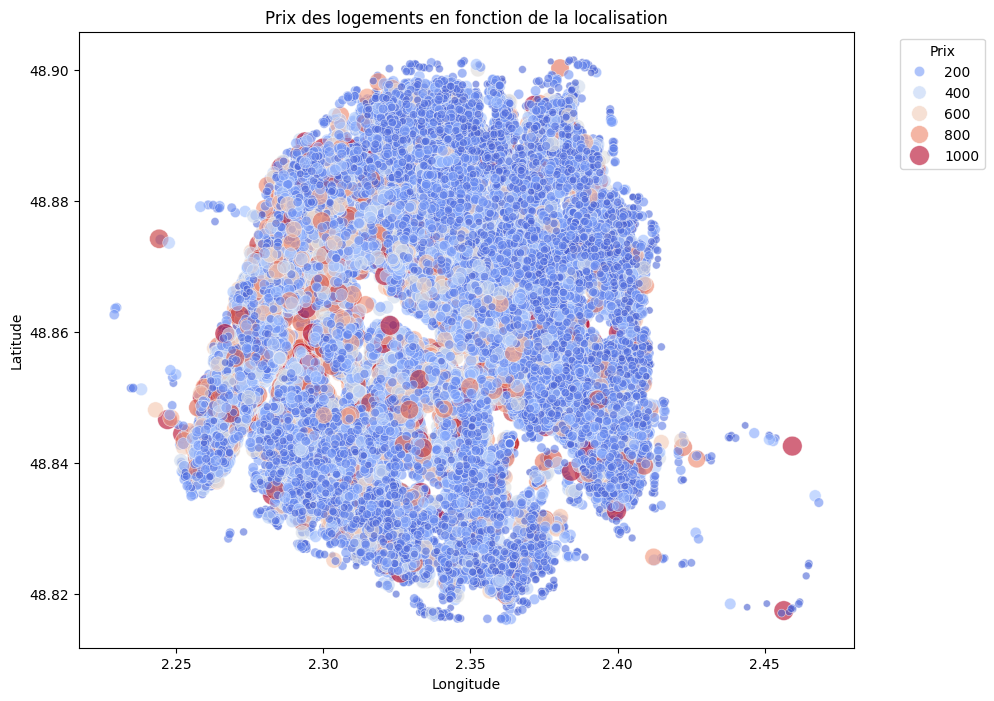

Prix moyen par quartier :
neighbourhood_cleansed
Élysée            282.733795
Palais-Bourbon    276.551376
Luxembourg        269.803612
Louvre            266.220859
Passy             256.814075
Hôtel-de-Ville    247.194758
Temple            232.663395
Bourse            225.725709
Panthéon          224.047644
Opéra             222.712711
Name: price, dtype: float64


In [89]:
# Scatter plot : Visualisation des prix sur une carte (latitude, longitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='price',
    size='price',
    sizes=(20, 200),
    palette='coolwarm',
    alpha=0.6
)
plt.title('Prix des logements en fonction de la localisation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Prix', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Identifier les quartiers (neighbourhood_cleansed) ayant les prix les plus élevés
neighbourhood_avg_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

print("Prix moyen par quartier :")
print(neighbourhood_avg_price.head(10))  # Afficher les 10 quartiers avec les prix moyens les plus élevés


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Mise à jour des colonnes pertinentes
features = ['bathrooms', 'bedrooms', 'accommodates', 'beds', 'latitude', 'longitude',
            'property_type', 'room_type']
target = 'price'

df_clean = df[features + [target]].dropna()

# Colonnes catégorielles et numériques
categorical_cols = ['property_type', 'room_type']
numerical_cols = ['bathrooms', 'bedrooms', 'accommodates', 'beds', 'latitude', 'longitude']

# Pipeline de transformation
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Diviser les données
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline mis à jour
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# Résumé
print(f"Données préparées :\nX_train shape: {X_train_prepared.shape}, X_test shape: {X_test_prepared.shape}")

Données préparées :
X_train shape: (48392, 63), X_test shape: (12098, 63)


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [87]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_prepared, y_train)


RandomForestRegressor(random_state=42)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions
y_pred = model.predict(X_test_prepared)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")


MAE: 83.50, MSE: 17271.96, R²: 0.34
